<span style='font-family:Lato'> <span style='font-size:110%;'>
CO2 emissions refer to the release of carbon dioxide gas into the atmosphere as a byproduct of human activities, particularly the burning of fossil fuels such as coal, oil, and natural gas. It is one of the primary greenhouse gases responsible for climate change and global warming.<br>
    The aim of today's study will be to predict this CO2 emissions using <a href='https://www.kaggle.com/datasets/bhuviranga/co2-emissions'>Kaggle Dataset.</a>
    </span>

In [1]:
#--Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'whitegrid', context = 'paper', font ='Georgia', font_scale = 1.2, palette = 'pastel')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#--Loading the dataset
df = pd.read_csv('/kaggle/input/co2-emissions/CO2 Emissions.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<span style='font-family:Lato'> <span style='font-size:110%;'> Lets look at the variables we are dealing with.
<ol><span style='font-family:Lato'> <span style='font-size:110%;'> 
    <li>Engine Size (L) and Cylinders: Generally, vehicles with larger engine sizes and more cylinders tend to emit more CO2. This is because larger engines require more fuel to operate, resulting in higher CO2 emissions.</li>

<li>Fuel Consumption: The fuel consumption of a vehicle, whether in the city, on the highway, or combined, directly impacts CO2 emissions. Higher fuel consumption leads to increased CO2 emissions, while lower fuel consumption results in reduced emissions.</li>

<li>Transmission: The type of transmission can affect CO2 emissions. Vehicles with automatic transmissions tend to have slightly higher emissions compared to vehicles with manual transmissions. However, the difference in emissions between the two depends on the specific vehicle and driving conditions.</li>

<li>Fuel Type: The type of fuel used by a vehicle has a significant impact on CO2 emissions. Vehicles running on fossil fuels like gasoline and diesel emit more CO2 compared to alternative fuels like electricity, hydrogen, or biofuels.</li>

<li>Vehicle Class: Different vehicle classes, such as sedans, SUVs, trucks, or sports cars, have varying weights, sizes, and aerodynamics, which can affect their CO2 emissions. Generally, larger and less aerodynamic vehicles tend to emit more CO2.</li>

<li>Make and Model: The make and model of a vehicle can also influence CO2 emissions. Some manufacturers prioritize fuel efficiency and employ technologies like hybrid systems, lightweight materials, or efficient engines, resulting in lower emissions compared to vehicles from other manufacturers.</li>


<span style='font-family:Lato'> <span style='font-size:110%;'>
    EXPLORATORY DATA ANALYSIS
    </span>

In [3]:
#--Getting the shape of dataset
df.shape

(7385, 12)

In [4]:
#--Checking the data type and null values
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<span style='font-family:Lato'> <span style='font-size:110%;'>
    DATA VISUALIZATION
    </span>

Text(0, 0.5, 'Frequency')

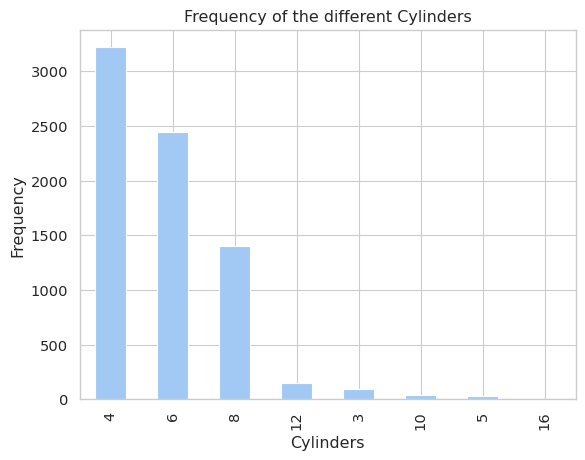

In [7]:
cylinders = df['Cylinders'].value_counts()
cylinders.plot(kind = 'bar')
plt.title('Frequency of the different Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')

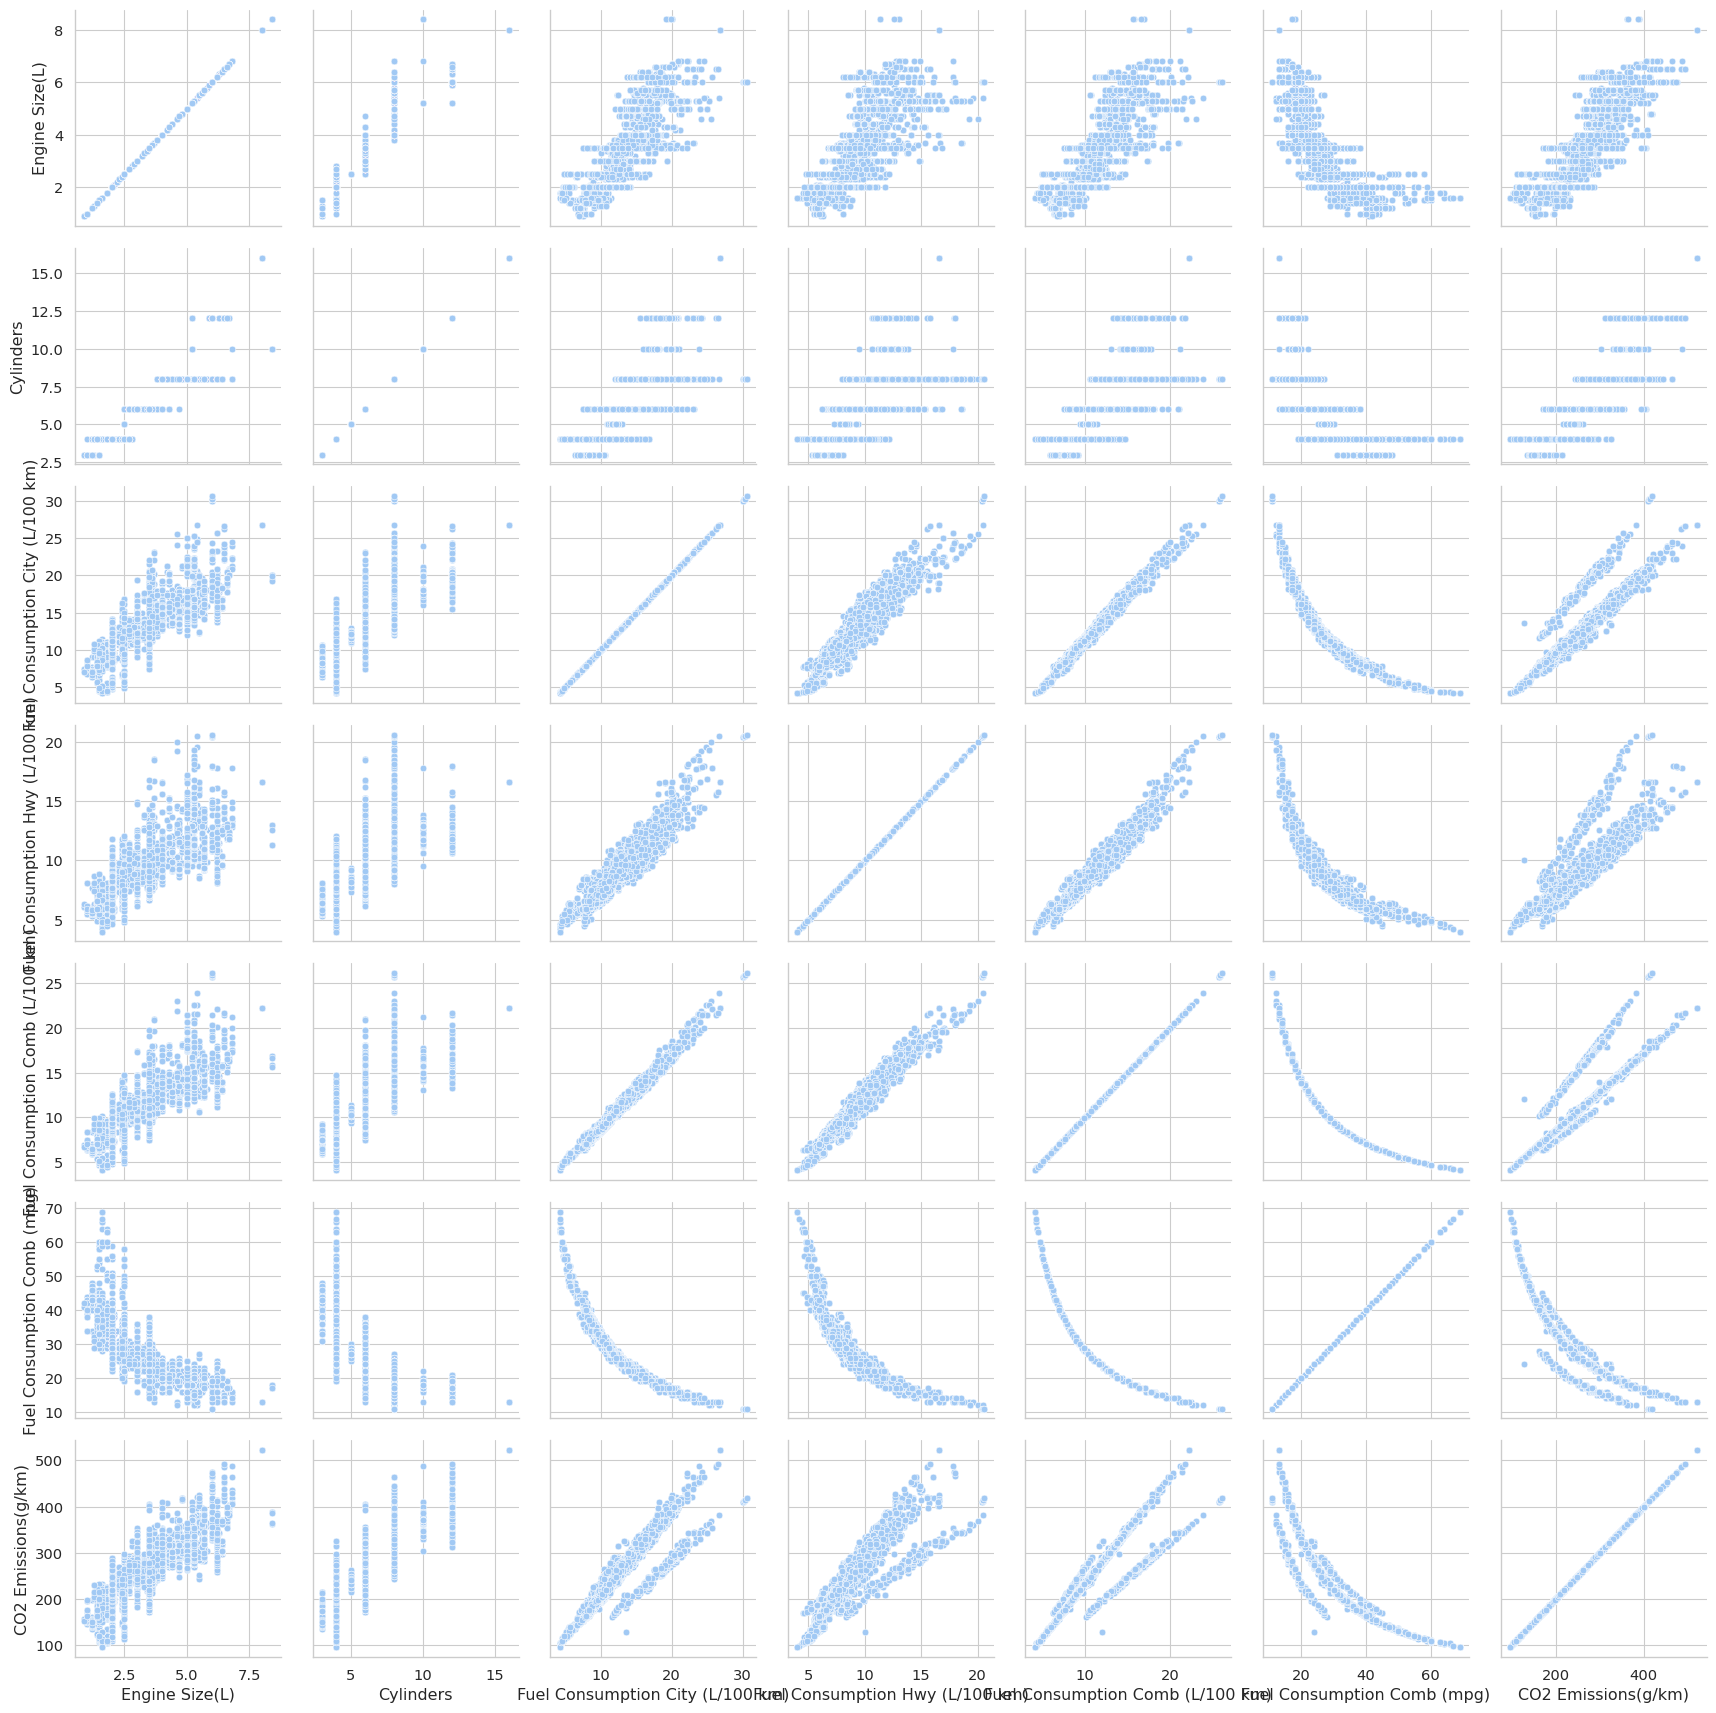

In [8]:
#--Getting the scatterplot for all the numeric values
grid = sns.PairGrid(df)
grid.map(sns.scatterplot)
plt.show()

<span style='font-family:Lato'> <span style='font-size:110%;'>
    MODEL BUILDING
    </span>

In [9]:
#--Splitting the data set 
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)']],
                                                   df['CO2 Emissions(g/km)'], test_size=0.30, random_state=0)

<span style='font-family:Lato'> <span style='font-size:110%;'> 
    I've kept it simple using just only three variables although feel free to make any changes to it and making new exciting models.
    </span>

In [10]:
#--Importing the algorithm
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X_train,Y_train)

In [11]:
#--Getting the prediction value
y_pred = model.predict(x_test)

In [12]:
#--The evaluation matrix
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [13]:
mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"The Coefficient of detemination is : {r2}")
print(f"The Mean Absolute error is : {mae}")
print(f"The Mean Sqaured error is : {mse}")

The Coefficient of detemination is : 0.8633449109322033
The Mean Absolute error is : 14.561860534816242
The Mean Sqaured error is : 464.02689943365783


<span style='font-family:Lato'> <span style='font-size:110%;'>
<ul><span style='font-family:Lato'> <span style='font-size:110%;'>
        <li> We started off with the Kaggle dataset.</li>
        <li> We did EDA and some Data Visualization.</li>
        <li> Then at last we build our model.</li>
        <li> By looking at the value of r2 score we can say that our model explains 86.33% which is decent enough in our case. </li>
        </span>
   <span style='font-family:Lato'> <span style='font-size:110%;'>
If you find this notebook any helpful do Upvote. Your upvote matters.
        <i> Happy Coding :) </i>